# Code: U21EC019

In [79]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [98]:
data=load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [93]:
X=data['data']
print(X.shape)

(569, 30)


In [95]:
Y=data['target']
classes = np.unique(Y)
classes

array([0, 1])

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [84]:
print(len(X_train), len(X_test))

426 143


In [85]:
X_train[0]

array([1.246e+01, 1.283e+01, 7.883e+01, 4.773e+02, 7.372e-02, 4.043e-02,
       7.173e-03, 1.149e-02, 1.613e-01, 6.013e-02, 3.276e-01, 1.486e+00,
       2.108e+00, 2.460e+01, 1.039e-02, 1.003e-02, 6.416e-03, 7.895e-03,
       2.869e-02, 4.821e-03, 1.319e+01, 1.636e+01, 8.324e+01, 5.340e+02,
       9.439e-02, 6.477e-02, 1.674e-02, 2.680e-02, 2.280e-01, 7.028e-02])

In [86]:
sc=StandardScaler()

In [87]:
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [88]:
model = Sequential()
model.add(Dense(30, input_dim =30, activation= 'relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                930       
                                                                 
 dense_21 (Dense)            (None, 120)               3720      
                                                                 
 dense_22 (Dense)            (None, 120)               14520     
                                                                 
 dense_23 (Dense)            (None, 1)                 121       
                                                                 
Total params: 19,291
Trainable params: 19,291
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy(
    name='binary_accuracy', dtype=None, threshold=0.5)],)

In [91]:
model.fit(X_train_scaled,y_train,epochs=10,batch_size=8)

Epoch 1/10


Z:\ml\ml\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 2s 11ms/step - loss: 0.5464 - binary_accuracy: 0.8099
Epoch 2/10
54/54 [==============================] - 0s 8ms/step - loss: 0.3298 - binary_accuracy: 0.9437
Epoch 3/10
54/54 [==============================] - 1s 11ms/step - loss: 0.2296 - binary_accuracy: 0.9531
Epoch 4/10
54/54 [==============================] - 1s 11ms/step - loss: 0.1794 - binary_accuracy: 0.9577
Epoch 5/10
54/54 [==============================] - 1s 11ms/step - loss: 0.1518 - binary_accuracy: 0.9577
Epoch 6/10
54/54 [==============================] - 1s 12ms/step - loss: 0.1336 - binary_accuracy: 0.9648
Epoch 7/10
54/54 [==============================] - 1s 12ms/step - loss: 0.1210 - binary_accuracy: 0.9648
Epoch 8/10
54/54 [==============================] - 1s 12ms/step - loss: 0.1119 - binary_accuracy: 0.9695
Epoch 9/10
54/54 [==============================] - 1s 12ms/step - loss: 0.1045 - binary_accuracy: 0.9695
Epoch 10/10
54/54 [==============================] - 1s 9m

In [92]:
scores=model.evaluate(X_test_scaled,y_test)

5/5 [==============================] - 0s 8ms/step - loss: 0.1147 - binary_accuracy: 0.9580


## Varying hyperparameters below

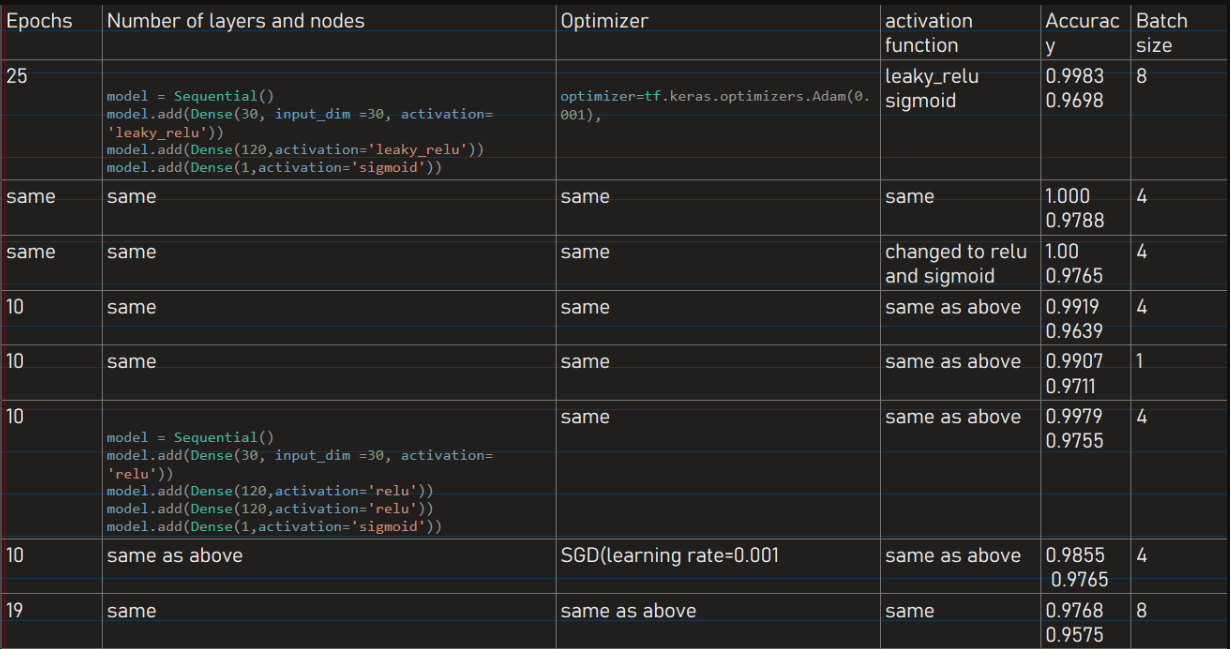

In [96]:
from IPython.display import Image
Image(filename='Screenshot 2024-11-22 004527.png')